# Pandas Data Structures

## Summary
In this notebook, we'll be covering:
- [Dataframes](#Dataframes)
- [Columns](#Columns)
- [Rows and Cells](#Rows-and-Cells)
- [Modifying Dataframes](#Modifying-Dataframes)

This is the first section to deal specifically with Pandas. Pandas is a powerful data analysis library that makes data science work much easier than it once was.

## Section 2.0: Dataframes

Load the pandas package, and assign it a shorthand name, 'pd'.

In [2]:
import pandas as pd

Don't worry about understanding this block of code, but you will need to run it to do the rest of this exercise. 
The important thing is, it stores a dataframe you can use into the variable named "df". 
We are using this instead of the pd.read_csv() function to load a dataframe for the purposes of these exercises. The read_csv() function is often used to load a dataframe from a .csv file, but given the Jupyter notebooks format, it is easier to load a dataframe this way for the purposes of this exercise.

In [3]:
import random

workout_dict = {'ID': [], 'Measurement Device': [], 'Heart Rate Max': [], 'Heart Rate Min': [], 'Heart Rate Avg': [],
              'Duration of exercise (min)': [], 'Exercise Type': []}
used_ids = []

for x in range(0, 500):
    id = random.randint(100000000, 999999999)
    while id in used_ids:
        id = random.randint(100000000, 999999999)
    used_ids.append(id)
    device = random.choice(['Skykandal', 'B-Wolf'])
    mu = random.randint(65, 85)
    min_rate = int(random.gauss(mu, 10))
    max_rate = int(random.gauss(mu + 55, 25))
    while max_rate <= min_rate:
        max_rate = int(random.gauss(mu + 55, 25))
    avg = random.gauss((max_rate + min_rate) / 2, (max_rate - min_rate) / 5)
    duration = random.randint(10, 90)
    exercise = random.choice(['Running', 'Running', 'Running', 'Bicycling', 'Swimming', 'Swimming',
                              'Weight training'])
    row = [device, min_rate, max_rate, avg, duration, exercise]
    workout_dict['ID'].append(id)
    workout_dict['Measurement Device'].append(row[0])
    workout_dict['Heart Rate Min'].append(row[1])
    workout_dict['Heart Rate Max'].append(row[2])
    workout_dict['Heart Rate Avg'].append(row[3])
    workout_dict['Duration of exercise (min)'].append(row[4])
    workout_dict['Exercise Type'].append(row[5])

df = pd.DataFrame(workout_dict)

View the first 5 rows of the dataframe stored in the variable named "df":

In [4]:
df.head()

,ID,Measurement Device,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling
1,280021235,Skykandal,107,77,91.563278,17,Swimming
2,759363739,Skykandal,110,73,83.615608,73,Running
3,462116912,Skykandal,128,60,110.301923,21,Swimming
4,338882499,B-Wolf,125,69,102.651735,33,Swimming


The id column uniquely identifies each row.

## Section 2.1: Columns

View names of the columns in the dataframe variable named 'df'.

In [5]:
df.columns

Index(['ID', 'Measurement Device', 'Heart Rate Max', 'Heart Rate Min',
       'Heart Rate Avg', 'Duration of exercise (min)', 'Exercise Type'],
      dtype='object')

### Columns

We will start by discussing how to access a column. The code below will print the Exercise type column.

In [6]:
df['Exercise Type']

0      Bicycling
1       Swimming
2        Running
3       Swimming
4       Swimming
         ...    
495      Running
496      Running
497      Running
498      Running
499      Running
Name: Exercise Type, Length: 500, dtype: object

We can simply look up the column in the dataframe (which we have named `df`) by using the column name as the key.

The column data type is a Pandas series. The values from this result on the right side are the values in the column. The values on the left are simply index values, which are unique for each row.
The "Length" value gives the number of rows, and the "dtype" value indicates the "data type".

In [7]:
df['Heart Rate Max']

0      143
1      107
2      110
3      128
4      125
      ... 
495    120
496    147
497    146
498    139
499    114
Name: Heart Rate Max, Length: 500, dtype: int64

You can see that this column is dtype `int64`. That's a dtype for integer numbers , which these all are. The Heart Rate Avg column, which is numeric but not integers, will be a floating point number, probably `float64`. The numbers at the end don't matter as much, just remember that there are `int`s for integers, `float`s for non-integer numbers (ones with decimal points, really), and `object`s for text (and some other less common things).

It is possible to loop over this column with a for loop. However, Pandas often has shortcuts for manipulating the data that make the for loop needed less often.

In [8]:
for x in df['Heart Rate Max']:
    print(x)

143
107
110
128
125
120
135
159
124
127
97
129
127
110
103
84
116
127
116
134
125
81
192
180
143
126
122
145
123
140
127
114
170
102
143
154
146
141
115
111
111
133
150
92
97
94
138
103
83
152
137
157
153
121
158
114
104
156
166
109
126
93
132
104
120
93
133
117
102
163
148
152
104
156
160
187
137
113
145
147
89
172
73
162
127
166
126
164
84
114
100
169
90
120
148
116
110
119
150
114
138
116
175
117
77
105
94
131
101
148
172
124
134
112
155
89
93
138
144
119
129
121
148
158
127
113
112
109
110
129
133
127
110
132
145
137
118
173
113
135
115
100
137
132
150
127
120
164
153
120
133
158
122
161
141
152
119
166
170
141
160
122
112
75
158
166
132
184
117
155
123
156
121
159
153
168
131
155
139
128
85
123
176
173
105
142
88
99
77
109
141
134
166
143
91
146
166
105
102
102
152
190
167
111
164
117
137
123
116
122
142
118
97
126
170
94
165
106
118
157
121
174
101
107
130
136
140
120
152
151
97
124
119
134
112
123
130
146
142
140
131
130
163
147
117
115
145
113
126
111
120
151
108
162
123
118
18

We can also access more than one column at once. We do this by passing a list of columns we want into the square brackets. Note that this means that we have two sets of square brackets, the inner one that defines the list and an outer one that says "get me these items from the dataframe".

In [9]:
df[['ID', 'Measurement Device']]

,ID,Measurement Device
0,398732022,B-Wolf
1,280021235,Skykandal
2,759363739,Skykandal
3,462116912,Skykandal
4,338882499,B-Wolf
...,...,...
495,309761226,Skykandal
496,501974933,Skykandal
497,409007066,Skykandal
498,770997985,Skykandal


#### Try writing some code in the space below that accesses more than one column at once. Access these columns: Measurement Device, Heart Rate Min, and Duration.

In [10]:
# put your code here


How do you find the column names? In small dataframes you can get the column names in the same way you check the data: `df.head()`. The `head` method prints out the first five rows of the dataframe by default, but you can type a number in between the parenthesis to make it show a different number of rows.

`head` is a method of the dataframe. This means that you write `name of dataframe.head()`, and `head` then shows you the head of the dataframe you named. If your dataframe was named blood_counts_frame you would write `blood_counts_frame.head()`.

In [11]:
df.head(10)

,ID,Measurement Device,Heart Rate Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling
1,280021235,Skykandal,107,77,91.563278,17,Swimming
2,759363739,Skykandal,110,73,83.615608,73,Running
3,462116912,Skykandal,128,60,110.301923,21,Swimming
4,338882499,B-Wolf,125,69,102.651735,33,Swimming
5,810015125,B-Wolf,120,75,91.354866,77,Bicycling
6,925208321,B-Wolf,135,72,101.655862,62,Running
7,679479711,B-Wolf,159,76,100.531878,66,Weight training
8,895398919,Skykandal,124,72,87.986052,36,Bicycling
9,924739444,Skykandal,127,65,83.102863,55,Bicycling


This code allows you to print just the column names:

In [12]:
print(list(df.columns))

['ID', 'Measurement Device', 'Heart Rate Max', 'Heart Rate Min', 'Heart Rate Avg', 'Duration of exercise (min)', 'Exercise Type']


We can also rename a column in a dataframe. For instance, this code renames the column 'Heart Rate Max' to 'Max'. 
To do this we use the dataframe `rename` method.

In [13]:
df.rename(columns={'Heart Rate Max': 'Max'}, inplace=True)
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling
1,280021235,Skykandal,107,77,91.563278,17,Swimming
2,759363739,Skykandal,110,73,83.615608,73,Running
3,462116912,Skykandal,128,60,110.301923,21,Swimming
4,338882499,B-Wolf,125,69,102.651735,33,Swimming


As you can see, `rename` is a method that is "attached" to the dataframe, so we use dot notation for it and then it automatically knows what dataframe it is renaming. There are several ways to specify that we are renaming columns. I think the easiest one to read is the `columns` argument. `columns` then equals a dictionary where the key is the current column name and the value is the new name. Note that we then have a comma, because the whole `columns={'Heart Rate Max': 'Max'}` section was just the first argument.

The `inplace` option is very common in pandas. When it is set to `True` whatever you are doing changes this dataframe. If it is set to `False` your operation generates a new dataframe that has been changed. By default it is `False`.

Use of the `False` option is demonstrated here.

In [14]:
new_frame = df.rename(columns={'Max': 'MAX!!!!'}, inplace=False)
print('Original dataframe column names:', df.columns.values)
print('New dataframe column names:', new_frame.columns.values)

Original dataframe column names: ['ID' 'Measurement Device' 'Max' 'Heart Rate Min' 'Heart Rate Avg'
 'Duration of exercise (min)' 'Exercise Type']
New dataframe column names: ['ID' 'Measurement Device' 'MAX!!!!' 'Heart Rate Min' 'Heart Rate Avg'
 'Duration of exercise (min)' 'Exercise Type']


As you can see, Max was changed to MAX!!!! only in the new frame (imaginatively named "new_frame") and not in the original frame. This is very useful when you aren't sure if what you are doing will work the way you think it will, and don't want to mess up your original dataframe.

Since the `columns` argument of `rename` takes a dictionary you can change as many column names at once as you want.

#### Below, write code that changes the names of `Heart Rate Min` to `Min` and `Duration of exercise` to `Duration`. Then print one of them, using the new name, to make sure it worked.

In [15]:
# put your code here


## Section 2.2: Rows and Cells

### Rows and Cells

Accessing rows works off of the index column of the dataframe. We can print the index for each row below just to remind ourselves what it looks like.

In [16]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

We can see that our index is just row numbers. In some cases it may be something different. You can reset the index to be the ID number, or anything else. But let's not do that, because that isn't useful for the sorts of things we're trying to do.

Instead, we will use the `loc` method of the dataframe to locate the row we want, by its index. Note that `loc` uses square brackets, like indexing from a list. Below, we will print out the second row (the first row would be index 0).

In [17]:
df.loc[1]

ID                            280021235
Measurement Device            Skykandal
Max                                 107
Heart Rate Min                       77
Heart Rate Avg                91.563278
Duration of exercise (min)           17
Exercise Type                  Swimming
Name: 1, dtype: object

We can also pass slice notation to `loc`. The code below replicates `df.head()`. It shows rows with index 0, 1, 2, 3, and 4.

In [18]:
df.loc[0:4]

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling
1,280021235,Skykandal,107,77,91.563278,17,Swimming
2,759363739,Skykandal,110,73,83.615608,73,Running
3,462116912,Skykandal,128,60,110.301923,21,Swimming
4,338882499,B-Wolf,125,69,102.651735,33,Swimming


We can also use `loc` on a column, to give us a single cell. The code below gives us the ID at index 3.

In [19]:
df['ID'].loc[3]

np.int64(462116912)

We can also do this with the multiple column lookup.

In [20]:
df[['ID', 'Measurement Device']].loc[3]

ID                    462116912
Measurement Device    Skykandal
Name: 3, dtype: object

We can also get a cell directly with `loc` by specifying both row and column. If you give `loc` a tuple it will assume that it is (row, column). The code below will return the maximum heart rate ('Max') for the fourth row (index 3).

In [21]:
df.loc[(3, 'Max')]

np.int64(128)

You can also get both multiple columns and multiple rows, to get a sub-dataframe.

In [22]:
df[['ID', 'Measurement Device']].loc[1:3]

,ID,Measurement Device
1,280021235,Skykandal
2,759363739,Skykandal
3,462116912,Skykandal


#### Below, write some code that does the inverse of `head` and prints the last five rows of the dataframe. However, leave out the ID column.

In [23]:
# your code goes here


(If you actually just want the inverse of `head` there's a command `tail` that does this. However, the purpose of the exercise above is practice.)

## Section 2.3 - Modifying Dataframes

### Modifying Dataframes

Adding a column to a dataframe is quite easy. Below, we will create a column that is simply the maximum heart rate divided by 2.

In [24]:
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling
1,280021235,Skykandal,107,77,91.563278,17,Swimming
2,759363739,Skykandal,110,73,83.615608,73,Running
3,462116912,Skykandal,128,60,110.301923,21,Swimming
4,338882499,B-Wolf,125,69,102.651735,33,Swimming


In [25]:
df['A'] = 'A'
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type,A
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling,A
1,280021235,Skykandal,107,77,91.563278,17,Swimming,A
2,759363739,Skykandal,110,73,83.615608,73,Running,A
3,462116912,Skykandal,128,60,110.301923,21,Swimming,A
4,338882499,B-Wolf,125,69,102.651735,33,Swimming,A


In [26]:
df['Max minus 2'] = df['Max'] - 2
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type,A,Max minus 2
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling,A,141
1,280021235,Skykandal,107,77,91.563278,17,Swimming,A,105
2,759363739,Skykandal,110,73,83.615608,73,Running,A,108
3,462116912,Skykandal,128,60,110.301923,21,Swimming,A,126
4,338882499,B-Wolf,125,69,102.651735,33,Swimming,A,123


All we had to do here was name a new column (much like adding a key to a dictionary) and set it equal to something else.

However, the thing we set it equal to must be either a single item or a list equal in length to the other columns. The code below shows what happens with a single item: it is just repeated in every cell of that column.

In [27]:
df['Two'] = 2
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type,A,Max minus 2,Two
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling,A,141,2
1,280021235,Skykandal,107,77,91.563278,17,Swimming,A,105,2
2,759363739,Skykandal,110,73,83.615608,73,Running,A,108,2
3,462116912,Skykandal,128,60,110.301923,21,Swimming,A,126,2
4,338882499,B-Wolf,125,69,102.651735,33,Swimming,A,123,2


This will break. We're specifying a length for the column, but it's two, and the other columns are length 500.

In [28]:
df['Breaking'] = [2, 2]

ValueError: Length of values (2) does not match length of index (500)

In later notebooks we'll generate data the same length as existing columns and fill new columns with it. For now, just remember not to fill a column with data that has a length but is the wrong length.

How do we remove a column? We use the `drop` method, which has a similar argument structure to `rename`. Here we just list the column names to drop. Again, `inplace=True` means "do this to the current dataframe".

The code below drops/removes the column named 'Two'.

In [29]:
df.drop(columns=['Two'], inplace=True)
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type,A,Max minus 2
0,398732022,B-Wolf,143,55,94.673006,62,Bicycling,A,141
1,280021235,Skykandal,107,77,91.563278,17,Swimming,A,105
2,759363739,Skykandal,110,73,83.615608,73,Running,A,108
3,462116912,Skykandal,128,60,110.301923,21,Swimming,A,126
4,338882499,B-Wolf,125,69,102.651735,33,Swimming,A,123


If you run that code above again it will fail, since the column Two no longer exists to be dropped.

The `drop` command can also be used to drop rows. By default, `drop` actually expects you to drop rows, and so you can simply provide an index to drop.

In [30]:
df.drop(0, inplace=True)
df.head()

,ID,Measurement Device,Max,Heart Rate Min,Heart Rate Avg,Duration of exercise (min),Exercise Type,A,Max minus 2
1,280021235,Skykandal,107,77,91.563278,17,Swimming,A,105
2,759363739,Skykandal,110,73,83.615608,73,Running,A,108
3,462116912,Skykandal,128,60,110.301923,21,Swimming,A,126
4,338882499,B-Wolf,125,69,102.651735,33,Swimming,A,123
5,810015125,B-Wolf,120,75,91.354866,77,Bicycling,A,118


However, while column creation and deletion are common in analysis, adding and deleting rows is less useful. Most row deletion happens as part of filtering, which we will cover in an upcoming notebook.

Creating rows is less useful (normally), and is somewhat harder to do. To add a row you create an entire new dataframe and then use the `concat` function to add the dataframes together. We won't cover this further here.

### Creating Dataframes
Creating dataframes can be useful in analysis. You may want to process data and make a new frame from the processed data only. So, how do we make a dataframe? The easiest way is to make a dictionary and then use `pd.DataFrame` to make it into a dataframe.

Why `pd.DataFrame`? `DataFrame` is a function from the pandas library. The `pd.DataFrame` notation means "DataFrame, from the pandas library" (much like `df.head()` means "head, of the frame df"). This is one reason we want to import pandas and change the name to pd, because we'll type pd a lot doing analysis with pandas.

In [31]:
test_dict = {'Column One': [1, 2], 'Column Two': [20, 78], 'Colum Three': ['C', 'K']}
new_df = pd.DataFrame(test_dict)
new_df.head()

,Column One,Column Two,Colum Three
0,1,20,C
1,2,78,K


#### Below, make a dictionary with at least three keys. One of the lists of values should be all numbers. Then turn it into a dataframe and use `head` to check that it worked.

In [32]:
# your code goes here


#### Now, create a new column that is your column of numbers divided by two. Again, use `head` to check your work.

In [33]:
# your code goes here


#### Finally, drop one of your columns. As before, use `head` to check that it happened correctly.

In [34]:
# your code goes here


### Combining Dataframes

When you load your data from the workbench, there is a high likelihood that you will have to combine two pre-existing dataframes together to make a new dataframe. For instance, there may be a dataframe representing people, and another dataframe representing medication prescriptions. Before combining these dataframes, each row in the person dataframe will represent a different person. The medication prescriptions dataframe will have one column with a person_id, and other information in other columns with information on medications that someone is prescribed, such as the medication name, and prescription date. To use information from both of these tables at once, you will need to join or merge by the person_id column that exists in both dataframes.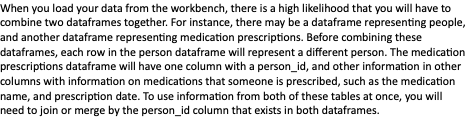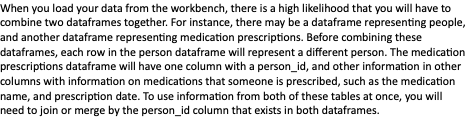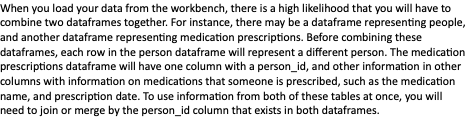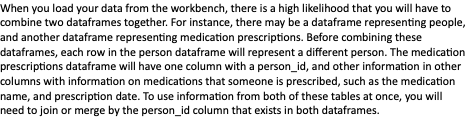

We will need some very small dataframes to see this behavior in.

In [35]:
dict_1 = {'ID': [1, 3, 5, 7, 9], 'B': [True, True, False, True, False]}
dict_2 = {'ID': [1, 2, 3, 4, 5], 'C': [57, 89, 23, 12, 65]}
dict_3 = {'ID_num': [1, 2, 3, 4, 5], 'C': [57, 89, 23, 12, 65]}
dict_4 = {'ID': [1, 2, 3, 4, 5], 'B': [57, 89, 23, 12, 65]}

frame_1 = pd.DataFrame(dict_1)
frame_2 = pd.DataFrame(dict_2)
frame_3 = pd.DataFrame(dict_3)
frame_4 = pd.DataFrame(dict_4)

frame_1 and frame_2 are meant to be matched. Each contains some of the same IDs but different variables in each frame. frame_3 is frame_2 but now ID is ID_num. frame_4 is frame_2 but now C is called B.

The simplest way to combine two dataframes is to just stick them together. `concat` will do this. It's not a dataframe method, so we write it `pd.concat` so Python knows to go looking for the function in pands.

In [36]:
pd.concat([frame_1, frame_2])

,ID,B,C
0,1,True,NaN
1,3,True,NaN
2,5,False,NaN
3,7,True,NaN
4,9,False,NaN
0,1,NaN,57.0
1,2,NaN,89.0
2,3,NaN,23.0
3,4,NaN,12.0
4,5,NaN,65.0


The syntax is simple: pass a list of frames to concatenate (add together).

#### Below, write code to concatenate all three frames together at once.

In [37]:
# your code goes here


There are some other `concat` options, but the issue with `concat` is that items that are the same (like ID 1) just get repeated. We would really like to attach dataframes in such a way that all items with IDs get their data filled in from B and C. To do this we use `pd.merge`. Here, we can only merge two frames at a time, so instead of a list we just pass both frames as arguments.

In [38]:
m = pd.merge(frame_1, frame_2)
m.head()

,ID,B,C
0,1,True,57
1,3,True,23
2,5,False,65


This gave us columns ID, B, and C for all items present in ID in both dataframes (all odd numbers between 1-5). Why ID? Because the column names matched.
       
If we attempt to merge frame_1 with frame_4 we do need to specify what column to use. Remember, frame_4 is frame_2, except that column C is called B, which means that frame_1 and frame_4 have two identical column names. If we do nothing this is what we get:

In [39]:
m = pd.merge(frame_1, frame_4)
m.head(10)

,ID,B


Since no rows match in both ID and B we get nothing. We should specify that ID is the real match using the `on` keyword.

In [40]:
m = pd.merge(frame_1, frame_4, on='ID')
m.head(10)

,ID,B_x,B_y
0,1,True,57
1,3,True,23
2,5,False,65


Note that this relabels the two different column Bs with underscore and a letter (x and y, by default). Columns with different names would not need this relabeling.

What if the columns are the same but don't have the same name? We can name equivalent columns with `right_on` and `left_on`. Right and left refer to the position of the dataframes in the argument list. (E.g., left is the first one, right is the second one.)

frame_3 was created to show this. It is frame_2, but with ID_num instead of ID.

In [41]:
m = pd.merge(frame_1, frame_3, left_on='ID', right_on='ID_num')
m.head(10)

,ID,B,ID_num,C
0,1,True,1,57
1,3,True,3,23
2,5,False,5,65


We still get both named columns, but we specified that ID on the left (frame_1) was to be matched to ID_num on the right (frame_3) and so we successfully combined the dataframes intelligently.

However, right now we got only items in ID that were present in both dataframes.We can change this behavior with the keyword `how`. We have four simple options:
- Inner: This is the default, where only items present in the matching column in both frames are included.
- Outer: All rows from both dataframes are included.
- Left: All columns in the left dataframe (in the order you write them in `pd.merge()`) are kept. Ones only present in the right dataframe than don't match up with any rows in the left dataframe are discarded.
- Right: The opposite of left. All columns from the 'right' dataframe are kept, and only rows in the left dataframe that match up with rows in the 'right' dataframe are kept.

We simply write `how=` and then the lowercase name of the join type in either single or double quotes. Here's an outer join version of merging frame_1 and frame_2.

This concept sometimes takes a little while to get the hang of. "Left" and "Inner" joins are probably the most frequently used in the workbench.

(Source for additional examples: https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)


In [42]:
m = pd.merge(frame_1, frame_2, how='outer')
m.head(10)

,ID,B,C
0,1,True,57.0
1,2,NaN,89.0
2,3,True,23.0
3,4,NaN,12.0
4,5,False,65.0
5,7,True,NaN
6,9,False,NaN


You'll see that any column with no data, like column B for where A is 4, becomes NaN. We'll discuss this more in the next notebook, but NaN is a blank cell.

#### Below, run a left merge on frame_1 and frame_3. Remember to specify how to merge them!

In [43]:
# your code goes here


That concludes data structures. Next up, we'll discuss cleaning up issues like these blank cells we created in our merges.